# Histogram Based Segmentation

In [29]:
from skimage import io
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float


from matplotlib import pyplot as plt


import numpy as np

from scipy import ndimage as nd

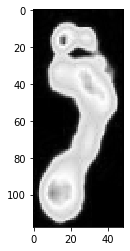

In [2]:
img_0 = io.imread("demo1.jpg",as_gray=True)
plt.imshow(img_0, cmap=plt.cm.gray, interpolation='nearest')

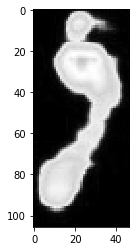

In [3]:
img_1 = io.imread("demo.jpg",as_gray=True)
plt.imshow(img_1, cmap=plt.cm.gray, interpolation='nearest')

# Denoising Image
### Using edge Preserving Filter

In [4]:
float_img_0 = img_as_float(img_0)
sigma_est_0 = np.mean(estimate_sigma(float_img_0, multichannel=False))

In [5]:
float_img_1 = img_as_float(img_1)
sigma_est_1 = np.mean(estimate_sigma(float_img_1, multichannel=False))

In [6]:
#print(sigma_est)

In [7]:
denoise_img_0 = denoise_nl_means(float_img_0, h=1.15 * sigma_est_0, fast_mode=False,patch_size=5, patch_distance=3, multichannel=True)

In [8]:
denoise_img_1 = denoise_nl_means(float_img_1, h=1.15 * sigma_est_1, fast_mode=False,patch_size=5, patch_distance=3, multichannel=True)

In [9]:
#print(denoise_img)

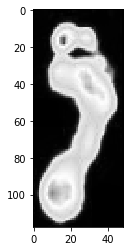

In [10]:
denoise_img_as_8byte_0 = img_as_ubyte(denoise_img_0)
plt.imshow(denoise_img_as_8byte_0, cmap=plt.cm.gray, interpolation='nearest')

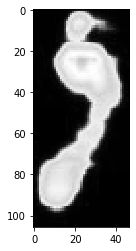

In [11]:
denoise_img_as_8byte_1 = img_as_ubyte(denoise_img_1)
plt.imshow(denoise_img_as_8byte_1, cmap=plt.cm.gray, interpolation='nearest')

# Histogram To Find Peak Value

### Flat Returns the Flattened Numpy Array(1D)

(array([701., 715., 707., 210., 125., 112.,  74.,  52.,  58.,  42.,  51.,
         26.,  31.,  35.,  15.,  15.,  19.,  12.,  23.,  11.,  14.,  13.,
          9.,  13.,  10.,   4.,   6.,   5.,   7.,   5.,   3.,   5.,   7.,
          4.,   3.,  10.,   3.,   6.,   4.,   4.,   6.,   1.,   2.,   7.,
          1.,   8.,   4.,   7.,   5.,   3.,   4.,   5.,   2.,   5.,   3.,
          0.,   1.,   1.,   3.,   4.,   4.,   2.,   2.,   2.,   4.,   1.,
          2.,   3.,   2.,   2.,   3.,   3.,   2.,   0.,   5.,   4.,   0.,
          0.,   1.,   4.,   2.,   5.,   2.,   1.,   1.,   5.,   2.,   5.,
          4.,   1.,   2.,   1.,   3.,   3.,   2.,   0.,   0.,   5.,   1.,
          7.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  4

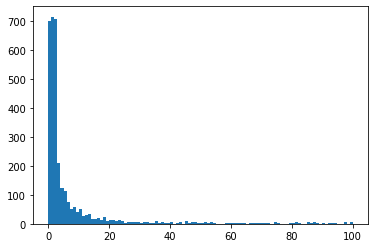

In [21]:
plt.hist(denoise_img_as_8byte_0.flat, bins=100, range=(0,100)) 

(array([701.,   0., 715.,   0.,   0., 707.,   0., 210.,   0.,   0., 125.,
          0., 112.,   0.,   0.,  74.,   0.,  52.,   0.,   0.,  58.,   0.,
         42.,   0.,   0.,  51.,   0.,  26.,   0.,   0.,  31.,   0.,  35.,
          0.,   0.,  15.,   0.,  15.,   0.,   0.,  19.,   0.,  12.,   0.,
          0.,  23.,   0.,  11.,   0.,   0.,  14.,   0.,  13.,   0.,   0.,
          9.,   0.,  13.,   0.,   0.,  10.,   0.,   4.,   0.,   0.,   6.,
          0.,   5.,   0.,   0.,   7.,   0.,   5.,   0.,   0.,   3.,   0.,
          5.,   0.,   0.,   7.,   0.,   4.,   0.,   0.,   3.,   0.,  10.,
          0.,   0.,   3.,   0.,   6.,   0.,   0.,   4.,   0.,   4.,   0.,
          6.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
         4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,
         8.8,  9.2,  9.6, 10. , 10.4, 10.8, 11.2, 11.6, 12. , 12.4, 12.8,
        13.2, 13.6, 14. , 14.4, 14.8, 15.2, 15.6, 16. , 16.4, 16.8, 17.2,
        17.6, 18. , 18

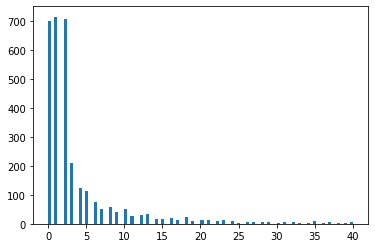

In [19]:
plt.hist(denoise_img_as_8byte_0.flat, bins=100, range=(0,40)) 

(array([688., 918., 426., 195., 122., 104.,  90.,  69.,  54.,  43.,  43.,
         29.,  40.,  19.,  20.,  13.,  12.,  17.,  12.,  14.,   8.,  15.,
          8.,   6.,   7.,   5.,   7.,   6.,   7.,  10.,   7.,   6.,   4.,
          5.,   5.,  10.,   4.,   3.,   1.,   5.,   1.,   7.,   2.,   3.,
          5.,   2.,   0.,   3.,   3.,   3.,   5.,   5.,   0.,   1.,   6.,
          5.,   3.,   0.,   2.,   5.,   4.,   7.,   6.,   2.,   2.,   9.,
          4.,   4.,   4.,   1.,   3.,   1.,   1.,   0.,   1.,   1.,   1.,
          3.,   2.,   3.,   2.,   3.,   4.,   1.,   4.,   3.,   2.,   2.,
          2.,   2.,   2.,   2.,   2.,   1.,   1.,   2.,   0.,   2.,   2.,
          5.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  4

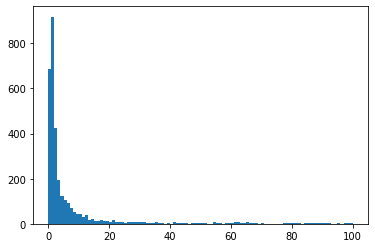

In [24]:
plt.hist(denoise_img_as_8byte_1.flat, bins=100, range=(0,100)) 

(array([688.,   0., 918.,   0.,   0., 426.,   0., 195.,   0.,   0., 122.,
          0., 104.,   0.,   0.,  90.,   0.,  69.,   0.,   0.,  54.,   0.,
         43.,   0.,   0.,  43.,   0.,  29.,   0.,   0.,  40.,   0.,  19.,
          0.,   0.,  20.,   0.,  13.,   0.,   0.,  12.,   0.,  17.,   0.,
          0.,  12.,   0.,  14.,   0.,   0.,   8.,   0.,  15.,   0.,   0.,
          8.,   0.,   6.,   0.,   0.,   7.,   0.,   5.,   0.,   0.,   7.,
          0.,   6.,   0.,   0.,   7.,   0.,  10.,   0.,   0.,   7.,   0.,
          6.,   0.,   0.,   4.,   0.,   5.,   0.,   0.,   5.,   0.,  10.,
          0.,   0.,   4.,   0.,   3.,   0.,   0.,   1.,   0.,   5.,   0.,
          1.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
         4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,
         8.8,  9.2,  9.6, 10. , 10.4, 10.8, 11.2, 11.6, 12. , 12.4, 12.8,
        13.2, 13.6, 14. , 14.4, 14.8, 15.2, 15.6, 16. , 16.4, 16.8, 17.2,
        17.6, 18. , 18

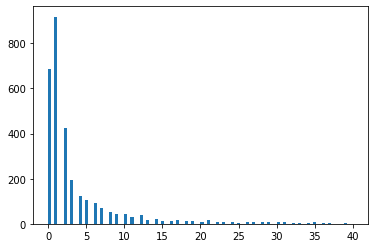

In [26]:
plt.hist(denoise_img_as_8byte_1.flat, bins=100, range=(0,40)) 

# Histogram Segmentation

In [15]:
#change this
segm1_0 = (denoise_img_as_8byte_0 <= 57)
segm2_0 = (denoise_img_as_8byte_0 > 57) & (denoise_img_as_8byte_0 <= 110)
segm3_0 = (denoise_img_as_8byte_0 > 110) & (denoise_img_as_8byte_0 <= 210)
segm4_0 = (denoise_img_as_8byte_0 > 210)

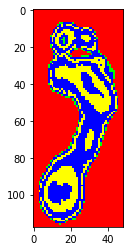

In [27]:
all_segments_0 = np.zeros((denoise_img_as_8byte_0.shape[0], denoise_img_as_8byte_0.shape[1], 3)) #nothing but denoise img size but blank

all_segments_0[segm1_0] = (1,0,0)
all_segments_0[segm2_0] = (0,1,0)
all_segments_0[segm3_0] = (0,0,1)
all_segments_0[segm4_0] = (1,1,0)
plt.imshow(all_segments_0)

In [16]:
#change this
segm1_1 = (denoise_img_as_8byte_1 <= 57)
segm2_1 = (denoise_img_as_8byte_1 > 57) & (denoise_img_as_8byte_1 <= 110)
segm3_1 = (denoise_img_as_8byte_1 > 110) & (denoise_img_as_8byte_1 <= 210)
segm4_1 = (denoise_img_as_8byte_1 > 210)

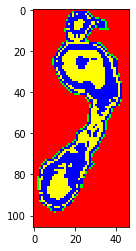

In [28]:
all_segments_1 = np.zeros((denoise_img_as_8byte_1.shape[0], denoise_img_as_8byte_1.shape[1], 3)) #nothing but denoise img size but blank

all_segments_1[segm1_1] = (1,0,0)
all_segments_1[segm2_1] = (0,1,0)
all_segments_1[segm3_1] = (0,0,1)
all_segments_1[segm4_1] = (1,1,0)
plt.imshow(all_segments_1)

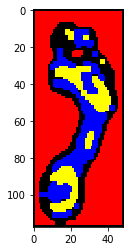

In [30]:
segm1_opened_0 = nd.binary_opening(segm1_0, np.ones((3,3)))
segm1_closed_0 = nd.binary_closing(segm1_opened_0, np.ones((3,3)))

segm2_opened_0 = nd.binary_opening(segm2_0, np.ones((3,3)))
segm2_closed_0 = nd.binary_closing(segm2_opened_0, np.ones((3,3)))

segm3_opened_0 = nd.binary_opening(segm3_0, np.ones((3,3)))
segm3_closed_0 = nd.binary_closing(segm3_opened_0, np.ones((3,3)))

segm4_opened_0 = nd.binary_opening(segm4_0, np.ones((3,3)))
segm4_closed_0 = nd.binary_closing(segm4_opened_0, np.ones((3,3)))

all_segments_cleaned_0 = np.zeros((denoise_img_as_8byte_0.shape[0], denoise_img_as_8byte_0.shape[1], 3))

all_segments_cleaned_0[segm1_closed_0] = (1,0,0)
all_segments_cleaned_0[segm2_closed_0] = (0,1,0)
all_segments_cleaned_0[segm3_closed_0] = (0,0,1)
all_segments_cleaned_0[segm4_closed_0] = (1,1,0)

plt.imshow(all_segments_cleaned_0)  

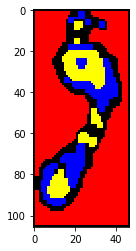

In [31]:
segm1_opened_1 = nd.binary_opening(segm1_1, np.ones((3,3)))
segm1_closed_1 = nd.binary_closing(segm1_opened_1, np.ones((3,3)))

segm2_opened_1 = nd.binary_opening(segm2_1, np.ones((3,3)))
segm2_closed_1 = nd.binary_closing(segm2_opened_1, np.ones((3,3)))

segm3_opened_1 = nd.binary_opening(segm3_1, np.ones((3,3)))
segm3_closed_1 = nd.binary_closing(segm3_opened_1, np.ones((3,3)))

segm4_opened_1 = nd.binary_opening(segm4_1, np.ones((3,3)))
segm4_closed_1 = nd.binary_closing(segm4_opened_1, np.ones((3,3)))

all_segments_cleaned_1 = np.zeros((denoise_img_as_8byte_1.shape[0], denoise_img_as_8byte_1.shape[1], 3))

all_segments_cleaned_1[segm1_closed_1] = (1,0,0)
all_segments_cleaned_1[segm2_closed_1] = (0,1,0)
all_segments_cleaned_1[segm3_closed_1] = (0,0,1)
all_segments_cleaned_1[segm4_closed_1] = (1,1,0)

plt.imshow(all_segments_cleaned_1)  